## Assignment B3
Given a bank customer, build an neural network-based classifier that can determine
whether they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source data set from
Kaggle. The dataset contains 10,000 sample points with 14 distinct features
such as Customer Id, Credit Score, Geography, Gender, Age, Tenure,
Balance etc.
Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the dataset into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and implement the same.
5. Print the accuracy score and confusion matrix (5points).

In [127]:
import pandas as pd
df = pd.read_csv('churn_modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [128]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [129]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [130]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [131]:
df.drop(["RowNumber","CustomerId", "Surname"], axis=1, inplace=True)

In [132]:
df = pd.get_dummies(df, columns=["Geography", "Gender"])

In [133]:
df.corr(method='pearson', numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


In [134]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='CreditScore'>

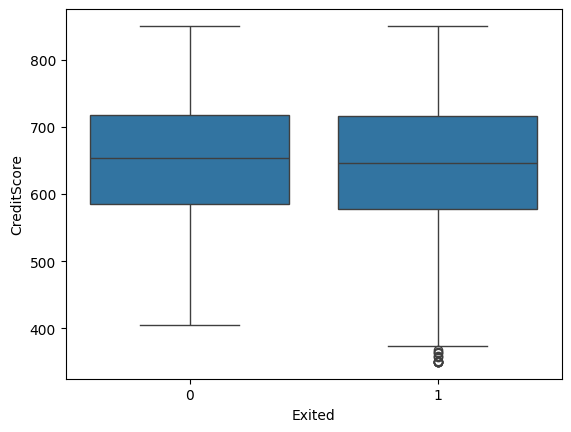

In [135]:
sns.boxplot(df, y="CreditScore", x="Exited")

<Axes: xlabel='Exited', ylabel='Age'>

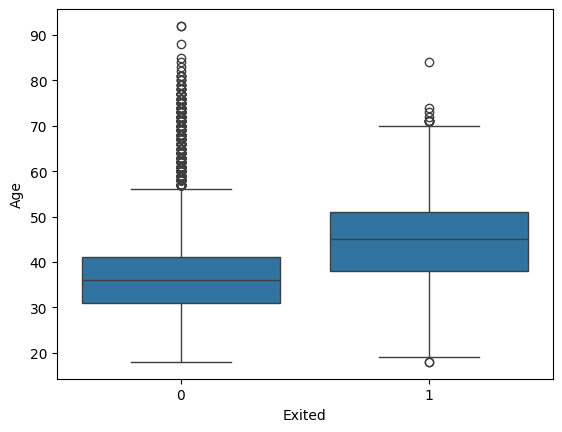

In [136]:
sns.boxplot(df, x="Exited", y="Age")

<Axes: xlabel='Exited', ylabel='Tenure'>

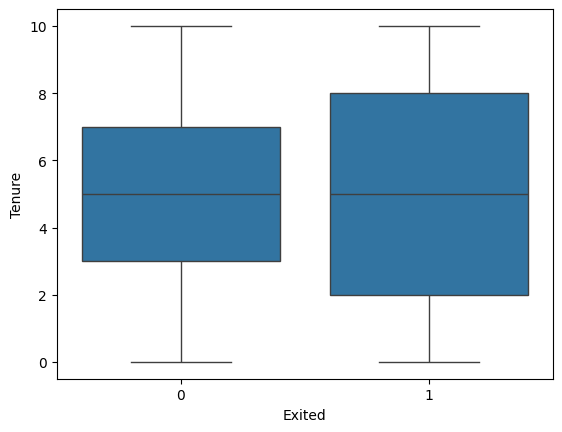

In [137]:
sns.boxplot(df, x="Exited", y="Tenure")

<Axes: xlabel='Exited', ylabel='Balance'>

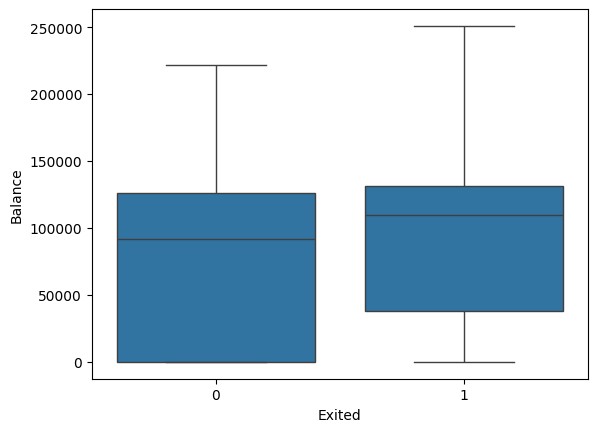

In [138]:
sns.boxplot(df, x="Exited", y="Balance")

In [139]:
def remove_outliers(feature):
    global df
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5*IQR
    ub = Q3 + 1.5*IQR
    df = df[(df[feature] >= lb) & (df[feature] <= ub)]

remove_outliers("Age")
remove_outliers("CreditScore")

In [140]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.012991,-0.000294,0.007582,0.011814,-0.001101,0.020118,0.002206,-0.016979,-0.011227,0.007147,0.005825,0.004274,-0.004274
Age,-0.012991,1.000000,-0.010538,0.041434,-0.032452,-0.016376,0.017816,-0.005630,0.358378,-0.050917,0.062851,-0.004196,0.030718,-0.030718
Tenure,-0.000294,-0.010538,1.000000,-0.012700,0.015211,0.019661,-0.027409,0.009779,-0.013226,-0.002208,-0.000206,0.002767,-0.014392,0.014392
Balance,0.007582,0.041434,-0.012700,1.000000,-0.304193,-0.013876,-0.007084,0.010063,0.116627,-0.229556,0.401663,-0.137900,-0.010347,0.010347
NumOfProducts,0.011814,-0.032452,0.015211,-0.304193,1.000000,0.002652,0.011154,0.013427,-0.050845,0.000309,-0.010848,0.010552,0.021201,-0.021201
HasCrCard,-0.001101,-0.016376,0.019661,-0.013876,0.002652,1.000000,-0.012219,-0.010165,-0.008355,0.004869,0.010082,-0.015782,-0.006599,0.006599
IsActiveMember,0.020118,0.017816,-0.027409,-0.007084,0.011154,-0.012219,1.000000,-0.010165,-0.143182,-0.000122,-0.015886,0.016119,-0.021972,0.021972
EstimatedSalary,0.002206,-0.005630,0.009779,0.010063,0.013427,-0.010165,-0.010165,1.000000,0.009405,-0.000785,0.010358,-0.009508,0.007114,-0.007114
Exited,-0.016979,0.358378,-0.013226,0.116627,-0.050845,-0.008355,-0.143182,0.009405,1.000000,-0.103658,0.173121,-0.053969,0.106548,-0.106548
Geography_France,-0.011227,-0.050917,-0.002208,-0.229556,0.000309,0.004869,-0.000122,-0.000785,-0.103658,1.000000,-0.581136,-0.574562,-0.009043,0.009043


In [141]:
df.drop(["CreditScore", "Tenure", "HasCrCard", "EstimatedSalary"], axis=1, inplace=True)

In [142]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='logistic',
    solver='adam',
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42
)

In [143]:
from sklearn.model_selection import train_test_split

X = df.drop(['Exited'], axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [144]:
model.fit(X=X_train, y=y_train)

,hidden_layer_sizes,"(32, ...)"
,activation,'logistic'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'adaptive'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [145]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1926,))

In [146]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1533,   24],
       [ 343,   26]])

In [147]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1557
           1       0.52      0.07      0.12       369

    accuracy                           0.81      1926
   macro avg       0.67      0.53      0.51      1926
weighted avg       0.76      0.81      0.75      1926



<Axes: >

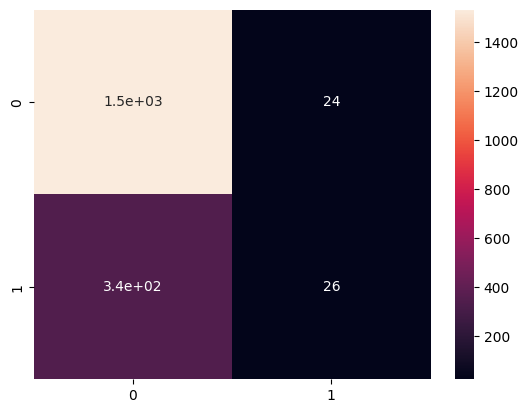

In [148]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True)